# Day of the Week
Does the price action data on Mondays for Bitcoin set the bias (bullish/bearish) for the rest of the week?

In [14]:
import pandas as pd
import sqlite3
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Create connection
conn = sqlite3.connect('../db/crypto-analysis.db')
c = conn.cursor()

In [3]:
df_btc = pd.read_sql(
    """
    SELECT date, symbol, open, close
    FROM coinbase
    WHERE symbol = 'BTC'
    ORDER BY date DESC
    """, conn
)

In [4]:
# Get day of the week given the date

day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_btc['day_of_week'] = df_btc['date'].apply(lambda x: day_names[datetime.strptime(x,'%Y-%m-%d').weekday()])
df_btc.head(10)

,date,symbol,open,close,day_of_week
0,2021-09-01,BTC,47110.33,48624.81,Wednesday
1,2021-08-31,BTC,46996.80,47112.50,Tuesday
2,2021-08-30,BTC,48802.58,46993.71,Monday
3,2021-08-29,BTC,48942.89,48802.58,Sunday
4,2021-08-28,BTC,49081.08,48942.94,Saturday
5,2021-08-27,BTC,46851.47,49077.57,Friday
6,2021-08-26,BTC,48991.57,46851.47,Thursday
7,2021-08-25,BTC,47682.45,48987.33,Wednesday
8,2021-08-24,BTC,49504.53,47682.45,Tuesday
9,2021-08-23,BTC,49284.38,49506.50,Monday


In [5]:
df_btc['pct_chng'] = round(((df_btc['open'] - df_btc['close'])/df_btc['close']) * 100,2)
df_btc.head(10)

,date,symbol,open,close,day_of_week,pct_chng
0,2021-09-01,BTC,47110.33,48624.81,Wednesday,-3.11
1,2021-08-31,BTC,46996.80,47112.50,Tuesday,-0.25
2,2021-08-30,BTC,48802.58,46993.71,Monday,3.85
3,2021-08-29,BTC,48942.89,48802.58,Sunday,0.29
4,2021-08-28,BTC,49081.08,48942.94,Saturday,0.28
5,2021-08-27,BTC,46851.47,49077.57,Friday,-4.54
6,2021-08-26,BTC,48991.57,46851.47,Thursday,4.57
7,2021-08-25,BTC,47682.45,48987.33,Wednesday,-2.66
8,2021-08-24,BTC,49504.53,47682.45,Tuesday,3.82
9,2021-08-23,BTC,49284.38,49506.50,Monday,-0.45


Check for outliers that could skew the data

In [6]:
df_btc.sort_values('pct_chng', ascending=False)

,date,symbol,open,close,day_of_week,pct_chng
537,2020-03-12,BTC,7938.05,4857.10,Thursday,63.43
2050,2016-01-15,BTC,430.04,357.53,Friday,20.28
1444,2017-09-14,BTC,3855.61,3250.40,Thursday,18.62
1300,2018-02-05,BTC,8167.90,6905.19,Monday,18.29
1320,2018-01-16,BTC,13590.00,11570.01,Tuesday,17.46
...,...,...,...,...,...,...
881,2019-04-02,BTC,4137.01,4901.93,Tuesday,-15.60
205,2021-02-08,BTC,38871.43,46448.10,Monday,-16.31
1361,2017-12-06,BTC,11718.34,14090.00,Wednesday,-16.83
1360,2017-12-07,BTC,14090.00,17390.01,Thursday,-18.98


In [43]:
df_btc_clean = df_btc[abs(df_btc['pct_chng']) <=25]
df_btc_clean.sort_values('pct_chng', ascending=False)

,date,symbol,open,close,day_of_week,pct_chng
2050,2016-01-15,BTC,430.04,357.53,Friday,20.28
1444,2017-09-14,BTC,3855.61,3250.40,Thursday,18.62
1300,2018-02-05,BTC,8167.90,6905.19,Monday,18.29
1014,2018-11-19,BTC,5560.00,4733.50,Monday,17.46
1320,2018-01-16,BTC,13590.00,11570.01,Tuesday,17.46
...,...,...,...,...,...,...
881,2019-04-02,BTC,4137.01,4901.93,Tuesday,-15.60
205,2021-02-08,BTC,38871.43,46448.10,Monday,-16.31
1361,2017-12-06,BTC,11718.34,14090.00,Wednesday,-16.83
1360,2017-12-07,BTC,14090.00,17390.01,Thursday,-18.98


In [44]:
def get_day_group(day):
    '''
    Given a day of the week, output whether it is a weekday or weekend day.
    '''

    if day in ['Saturday','Sunday']:
        return 'weekend'
    else:
        return 'weekday'

df_btc_clean = df_btc_clean.copy()
df_btc_clean['day_grp'] = df_btc_clean['day_of_week'].apply(lambda x: get_day_group(x))
df_btc_clean.head()

,date,symbol,open,close,day_of_week,pct_chng,day_grp
0,2021-09-01,BTC,47110.33,48624.81,Wednesday,-3.11,weekday
1,2021-08-31,BTC,46996.80,47112.50,Tuesday,-0.25,weekday
2,2021-08-30,BTC,48802.58,46993.71,Monday,3.85,weekday
3,2021-08-29,BTC,48942.89,48802.58,Sunday,0.29,weekend
4,2021-08-28,BTC,49081.08,48942.94,Saturday,0.28,weekend


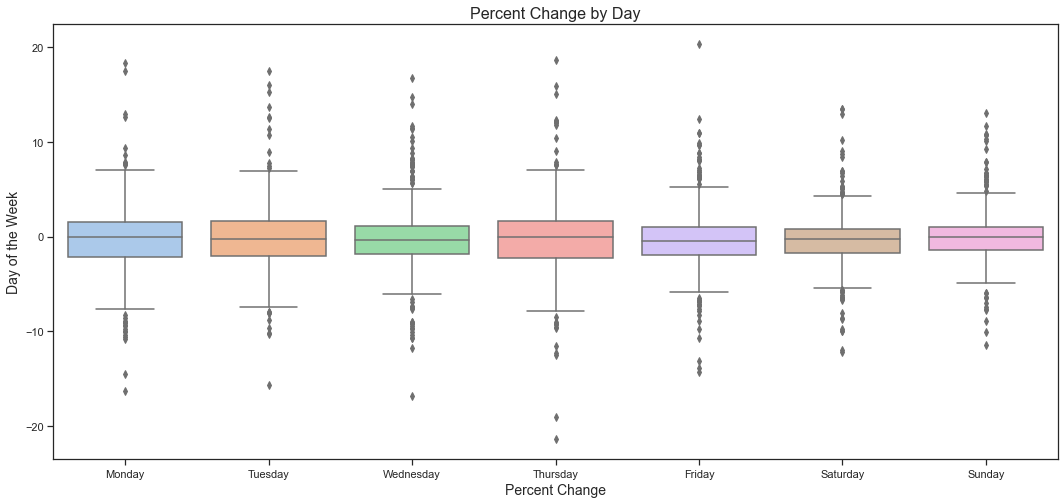

In [29]:
fig, ax = plt.subplots(figsize=(18,8))

sns.set_theme(style="ticks", palette="pastel")

boxplot = sns.boxplot(
    x="day_of_week", 
    y='pct_chng', 
    data=df_btc_clean,
    order=day_names,
    # orient="h"
)
# boxplot = sns.stripplot(
#     x="day_of_week", 
#     y="pct_chng", 
#     data=df_btc_clean, 
#     marker="o", 
#     alpha=0.3, 
#     color="black", 
#     order=day_names,
# )

boxplot.axes.set_title("Percent Change by Day", fontsize=16)
boxplot.set_xlabel("Percent Change", fontsize=14)
boxplot.set_ylabel("Day of the Week", fontsize=14)

plt.show()

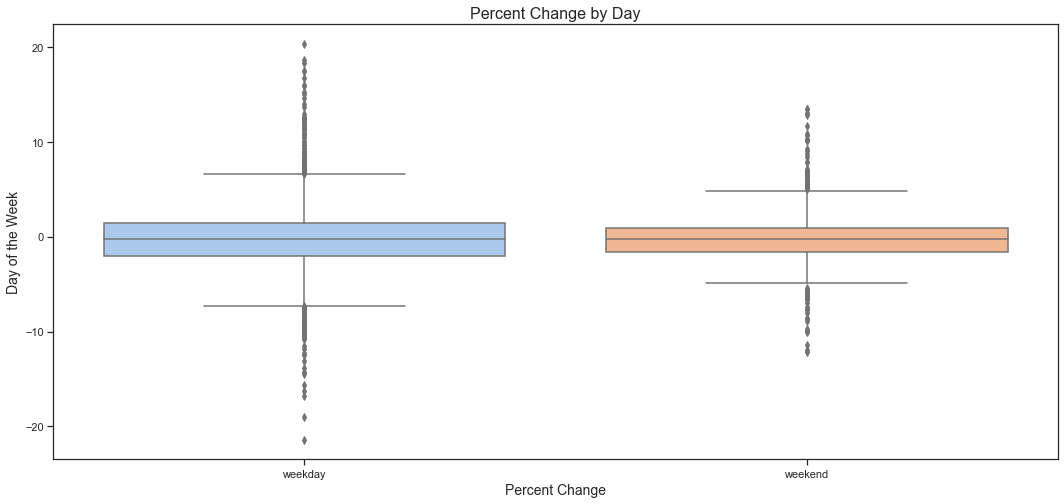

In [46]:
fig, ax = plt.subplots(figsize=(18,8))

sns.set_theme(style="ticks", palette="pastel")

boxplot = sns.boxplot(
    x="day_grp", 
    y='pct_chng', 
    data=df_btc_clean,
    # order=day_names,
    # orient="h"
)
# boxplot = sns.stripplot(
#     x="day_of_week", 
#     y="pct_chng", 
#     data=df_btc_clean, 
#     marker="o", 
#     alpha=0.3, 
#     color="black", 
#     order=day_names,
# )

boxplot.axes.set_title("Percent Change by Day", fontsize=16)
boxplot.set_xlabel("Percent Change", fontsize=14)
boxplot.set_ylabel("Day of the Week", fontsize=14)

plt.show()

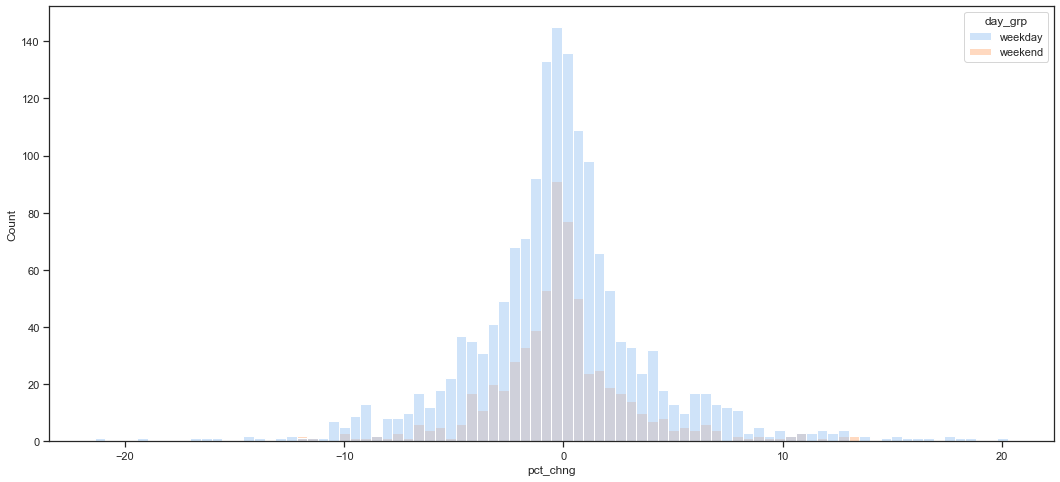

In [45]:
fig, ax = plt.subplots(figsize=(18,8))

sns.histplot(
    data=df_btc_clean, 
    x="pct_chng", 
    hue="day_grp",
    # element="step"
    # multiple="stack"
)
boxplot.axes.set_title("Percent Change by Day", fontsize=16)
boxplot.set_xlabel("Percent Change", fontsize=14)

plt.show()

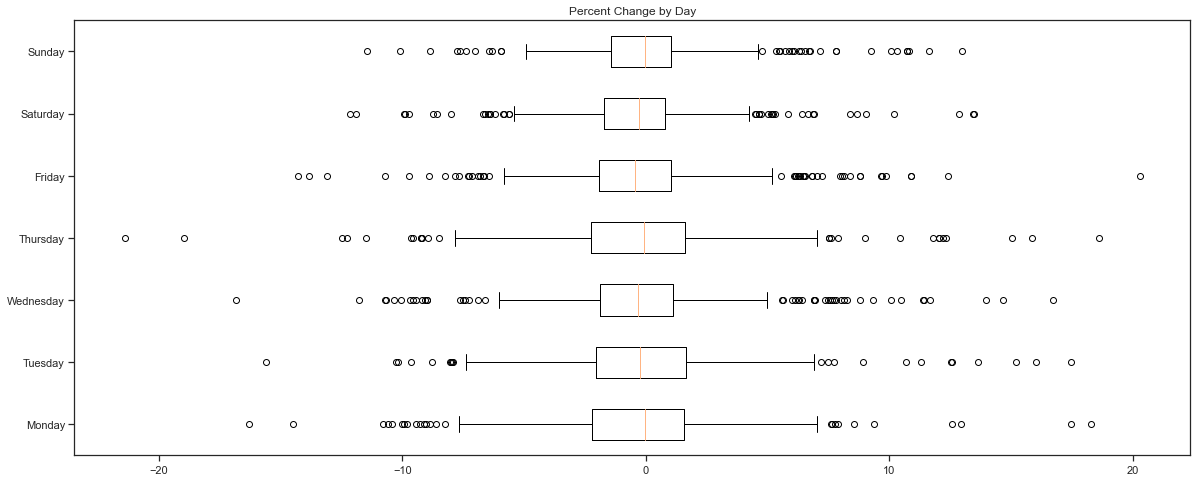

In [30]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('Percent Change by Day')

plots = [
    df_btc_clean[df_btc_clean['day_of_week'] == 'Monday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Tuesday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Wednesday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Thursday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Friday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Saturday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Sunday']['pct_chng']
]
ax.boxplot(plots, vert=False, labels=day_names)

plt.show()